# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for date conversions for calculating trip durations
import datetime as datetime



**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


- find if there is any null values
- find the data types
- get an idea about the size of the dataset

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
print(df0.shape)

print(df0.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use `.describe()`.

In [5]:
df0.duplicated().value_counts()

False    22699
dtype: int64

In [6]:
# Use .describe()
df0.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [7]:
# Check the format of the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
# Convert datetime columns to datetime
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])
df0['tpep_pickup_datetime']  = pd.to_datetime(df0['tpep_pickup_datetime'])

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column
df0['duration'] = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']
df0['duration'] = df0['duration'].apply(lambda x : x.total_seconds()/60)

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [10]:
df0.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

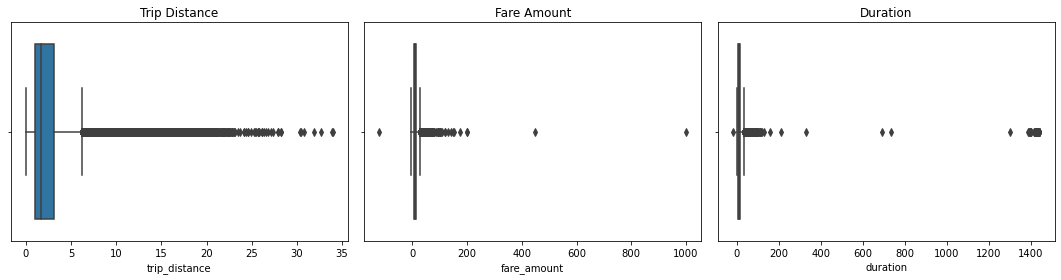

In [11]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

sns.boxplot(x='trip_distance', data=df0, ax=ax[0],showfliers=True)
ax[0].set_title('Trip Distance')

sns.boxplot(x='fare_amount', data=df0, ax=ax[1],showfliers=True)
ax[1].set_title('Fare Amount')

sns.boxplot(x='duration', data=df0, ax=ax[2],showfliers=True)
ax[2].set_title('Duration')

plt.tight_layout()

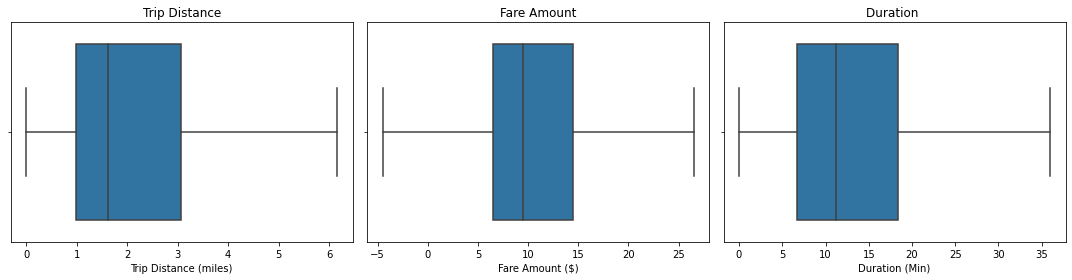

In [12]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

sns.boxplot(x='trip_distance', data=df0, ax=ax[0],showfliers=False)
ax[0].set_title('Trip Distance')
ax[0].set_xlabel('Trip Distance (miles)')

sns.boxplot(x='fare_amount', data=df0, ax=ax[1],showfliers=False)
ax[1].set_title('Fare Amount')
ax[1].set_xlabel('Fare Amount ($)')

sns.boxplot(x='duration', data=df0, ax=ax[2],showfliers=False)
ax[2].set_title('Duration ')
ax[2].set_xlabel('Duration (Min)')

plt.tight_layout()

In [13]:
df0['trip_distance'].min()

0.0

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

- Which variable(s) contains outliers?
    - yes, all three variables contains outliers

- Are the values in the trip_distance column unbelievable?
    - No, there are no null values in trip_distance column

- What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?
    - 0 values for trip_distance,fares or duration doesn't make sense
    - (-)ve values for fares means a refund, but -ve values for duration doesn't make sense. 
    - there are no -ve values for distance

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
df0.sort_values(by='trip_distance').drop_duplicates().head(10)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
22026,63642923,1,2017-07-27 07:44:24,2017-07-27 07:44:24,1,0.0,1,N,41,264,2,10.5,0.0,0.5,0.0,0.0,0.3,11.3,0.000000
795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.0,1,N,246,264,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.000000
6908,24162045,2,2017-03-26 02:07:08,2017-03-26 02:07:12,1,0.0,5,N,61,61,1,18.0,0.0,0.0,2.0,0.0,0.3,20.3,0.066667
13561,14504365,1,2017-02-23 16:06:31,2017-02-23 16:06:54,2,0.0,5,N,175,175,3,32.0,0.0,0.0,0.0,0.0,0.3,32.3,0.383333
12238,95544923,1,2017-11-11 09:28:13,2017-11-11 09:28:27,2,0.0,1,N,145,145,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.233333
6878,69466211,2,2017-08-17 04:06:26,2017-08-17 04:06:29,4,0.0,5,N,100,100,1,98.5,0.0,0.5,0.0,0.0,0.3,99.3,0.050000
14372,108639975,1,2017-12-22 13:39:55,2017-12-22 13:44:23,1,0.0,1,N,226,226,2,4.5,0.0,0.5,0.0,0.0,0.3,5.3,4.466667
20638,106367018,1,2017-12-15 16:09:43,2017-12-15 16:09:43,1,0.0,1,N,43,264,2,2.5,1.0,0.5,0.0,0.0,0.3,4.3,0.000000
920,92102517,2,2017-10-31 20:29:53,2017-10-31 20:30:27,1,0.0,1,N,50,50,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.566667
16263,5716905,1,2017-01-27 20:58:29,2017-01-27 20:58:50,1,0.0,1,N,249,249,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.350000


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
len(df0[df0['trip_distance']==0])

148

#### `fare_amount` outliers

In [16]:
df0['fare_amount'].describe()


count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [17]:
# Impute values less than $0 with 0
df0['fare_amount'] = df0['fare_amount'].apply(lambda x: 0 if x < 0 else x)
df0['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [18]:
def impute_maximum(df,column_list, iqrfactor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        df: The target data frame
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col]<0 ,col]=0

        # Calculate upper threshold
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
    
        iqr = q3 - q1 
        newHighThreshould = q3 + (iqrfactor * iqr)
        
        #print(newHighThreshould)
        # Reassign values > threshold to threshold
        df.loc[df[col] > newHighThreshould, col] = newHighThreshould 
        
        df[col].describe()
impute_maximum (df0, ['fare_amount'], 6)

#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
df0['fare_amount'].describe()

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###

In [21]:
# Impute the high outliers
impute_maximum(df0,['duration'],6)
df0['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [22]:
# Create `pickup_dropoff` column
df0.head()
df0['pickup_dropoff'] = df0.apply(lambda x: str(x['PULocationID']) +'_'+ str(x['DOLocationID']), axis=1)


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [23]:
grouped=df0.groupby(by='pickup_dropoff').mean()['trip_distance']

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [24]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
#grouped_dict = grouped_dict['trip_distance']
len(grouped_dict)

4172

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [25]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
df0['mean_distance']
 

0         3.521667
1         3.108889
2         0.881429
3         3.700000
4         4.435000
           ...    
22694     1.098214
22695    18.757500
22696     0.684242
22697     2.077500
22698     1.476970
Name: mean_distance, Length: 22699, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [26]:
df0['mean_distance']

0         3.521667
1         3.108889
2         0.881429
3         3.700000
4         4.435000
           ...    
22694     1.098214
22695    18.757500
22696     0.684242
22697     2.077500
22698     1.476970
Name: mean_distance, Length: 22699, dtype: float64

In [27]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
grouped=df0.groupby(by='pickup_dropoff').mean()['duration']

grouped_dict = grouped.to_dict()
#grouped_dict = grouped_dict['duration']

# mean trip duration for all trips with those pickup_dropoff combos
df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

# Confirm that it worked
df0['mean_duration']

0        22.847222
1        24.470370
2         7.250000
3        30.250000
4        14.616667
           ...    
22694     8.594643
22695    59.560417
22696     6.609091
22697    16.650000
22698     9.405556
Name: mean_duration, Length: 22699, dtype: float64

In [28]:
df0['mean_duration']

0        22.847222
1        24.470370
2         7.250000
3        30.250000
4        14.616667
           ...    
22694     8.594643
22695    59.560417
22696     6.609091
22697    16.650000
22698     9.405556
Name: mean_duration, Length: 22699, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [29]:
# Create 'day' col

df0['Day'] = df0.apply(lambda x: x['tpep_pickup_datetime'].strftime('%A'), axis=1)

# Create 'month' col
df0['Month'] = df0.apply(lambda x: x['tpep_pickup_datetime'].strftime('%B'), axis=1)

df0.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,Day,Month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100_231,3.521667,22.847222,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186_43,3.108889,24.470370,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262_236,0.881429,7.250000,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188_97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4_112,4.435000,14.616667,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [52]:
# Create 'rush_hour' col


df0['rush_hour'] = df0.apply(lambda x: 1 if (x['tpep_pickup_datetime'].hour >= 6 and x['tpep_pickup_datetime'].hour < 10 ) or 
                                            (x['tpep_pickup_datetime'].hour >= 16 and x['tpep_pickup_datetime'].hour < 20) else 0, axis=1)
#df0['rush_hour'] = df0.apply(lambda x: 1 if (x['tpep_pickup_datetime'].hour >= 6 and x['tpep_pickup_datetime'].minute >= 0
#                                             or x['tpep_dropoff_datetime'].hour <= 9 and x['tpep_dropoff_datetime'].minute < 60) and 
#                             (x['tpep_pickup_datetime'].hour >= 16 and x['tpep_pickup_datetime'].minute >= 0
#                              or x['tpep_dropoff_datetime'].hour <= 19 and x['tpep_dropoff_datetime'].minute < 60 ) else 0,axis=1)

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0['rush_hour'] = df0.apply(lambda x: 0 if x['Day'] == 'Saturday' or x['Day'] == 'Sunday' else x['rush_hour'], axis=1)

In [53]:
df0[['tpep_pickup_datetime','tpep_dropoff_datetime','Day','rush_hour']].head(50)

,tpep_pickup_datetime,tpep_dropoff_datetime,Day,rush_hour
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Saturday,0
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Tuesday,0
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Friday,1
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Sunday,0
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Saturday,0
5,2017-03-25 20:34:11,2017-03-25 20:42:11,Saturday,0
6,2017-05-03 19:04:09,2017-05-03 20:03:47,Wednesday,1
7,2017-08-15 17:41:06,2017-08-15 18:03:05,Tuesday,1
8,2017-02-04 16:17:07,2017-02-04 16:29:14,Saturday,0
9,2017-11-10 15:20:29,2017-11-10 15:40:55,Friday,0


In [ ]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

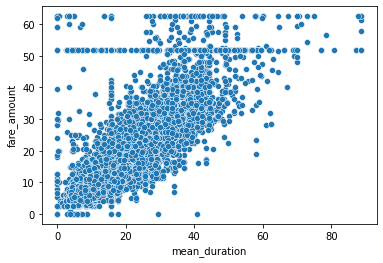

In [54]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(x='mean_duration', y='fare_amount', data=df0)


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [58]:
### YOUR CODE HERE ###
df0[df0['fare_amount'] == 52][['fare_amount','tip_amount','RatecodeID']]

,fare_amount,tip_amount,RatecodeID
11,52.0,14.58,2
110,52.0,0.00,2
161,52.0,0.00,2
247,52.0,0.00,2
379,52.0,14.64,2
...,...,...,...
22593,52.0,0.00,2
22604,52.0,0.00,2
22620,52.0,5.50,2
22686,52.0,14.84,1


Examine the first 30 of these trips.

In [60]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df0.head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,Day,Month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100_231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186_43,3.108889,24.470370,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262_236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188_97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4_112,4.435000,14.616667,Saturday,April,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,8.000000,161_236,2.052258,11.855376,Saturday,March,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,79_241,12.830000,59.633333,Wednesday,May,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,21.983333,237_114,4.022500,26.437500,Tuesday,August,1
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80,12.116667,234_249,1.019259,7.873457,Saturday,February,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55,20.433333,239_237,1.580000,10.541111,Friday,November,0


**Question:** What do you notice about the first 30 trips?

==> ENTER YOUR RESPONSE HERE

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [62]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [85]:
df1 = df0.drop(['Unnamed: 0','tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance', 'RatecodeID',
               'store_and_fwd_flag','PULocationID','DOLocationID','payment_type','extra','mta_tax','tip_amount',
               'tolls_amount','improvement_surcharge','total_amount','duration', 'pickup_dropoff', 'Day', 'Month' ],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

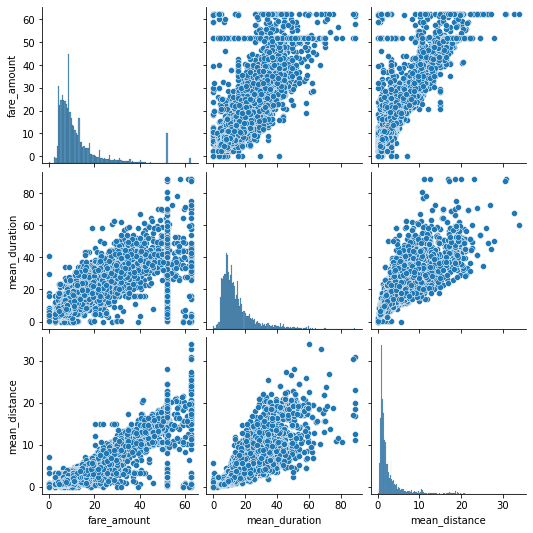

In [73]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df1[['fare_amount', 'mean_duration', 'mean_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [70]:
# Correlation matrix to help determine most correlated variables
df1.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


Visualize a correlation heatmap of the data.

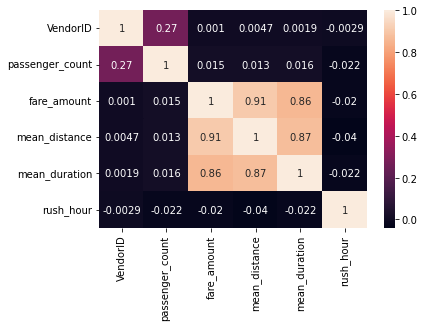

In [72]:
# Create correlation heatmap
sns.heatmap(df1.corr(), annot=True)

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? The mean_distance and mean_duration

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [88]:
### YOUR CODE HERE ###
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  object 
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.0+ MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [131]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
X = df1.drop('fare_amount',axis=1)


# Set y variable
y = df1[['fare_amount']]




In [90]:
# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [91]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  object 
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.0+ MB


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [97]:
# Packages for OLS, MLR, confusion matrix
from statsmodels.formula.api import ols
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [93]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [96]:
# Standardize the X variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Fit the model

Instantiate your model and fit it to the training data.

In [99]:
# Fit your model to the training data
lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [101]:
model.intercept_

12.972938510919503

In [111]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [105]:
predictions = model.predict(X_train)

In [124]:
# Evaluate the model performance on the training data
print('Sum of squares:', lm.score(X_train_scaled, y_train))
y_pred_train = lm.predict(X_train_scaled)
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Sum of squares: 0.8470163622686283
R^2: 0.8470163622686284
MAE: 2.1949662967084778
MSE: 17.259901165379762
RMSE: 4.154503720708378


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [125]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [126]:
# Evaluate the model performance on the testing data
print('Sum of squares:', lm.score(X_test_scaled, y_test))
y_pred_test = lm.predict(X_test_scaled)
print('R^2:', metrics.r2_score(y_test, y_pred_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Sum of squares: 0.8414394825887801
R^2: 0.8414394825887801
MAE: 2.122870158967448
MSE: 16.97776635528642
RMSE: 4.120408518009643


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [132]:
y_test.head()

9199     12.5
4955      6.0
16833    12.0
13244    20.5
1063     14.0
Name: fare_amount, dtype: float64

In [133]:
# Create a `results` dataframe
results = pd.DataFrame( {'Actual' : y_test,
                        'Predicted' : y_pred_test,
                        'Residual': y_test - y_pred_test})
results.head(5)

,Actual,Predicted,Residual
9199,12.5,9.596348,2.903652
4955,6.0,8.597582,-2.597582
16833,12.0,9.182915,2.817085
13244,20.5,20.652745,-0.152745
1063,14.0,15.362514,-1.362514


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

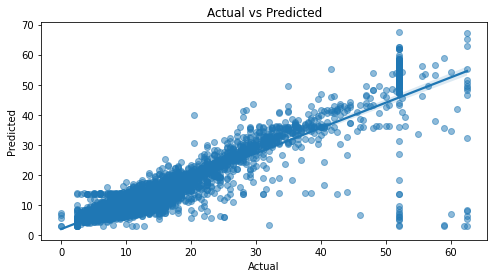

In [148]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(8,4))
sns.regplot(data=results, x='Actual', y = 'Predicted', scatter_kws={'alpha': 0.5})
plt.title('Actual vs Predicted')
plt.show()

Visualize the distribution of the `residuals` using a histogram.

Text(0.5, 1.0, 'Distribution of Residuls')

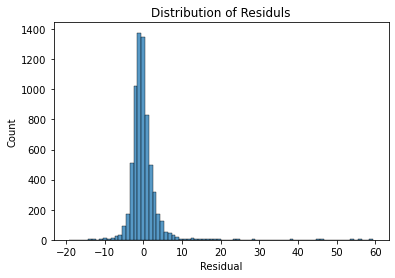

In [160]:
# Visualize the distribution of the `residuals`
sns.histplot(results['Residual'], bins=80)
plt.title('Distribution of Residuls')



In [155]:
# Calculate residual mean
print('Mean residual:', round(np.mean(results['Residual']),4))

Mean residual: -0.0015


Create a scatterplot of `residuals` over `predicted`.

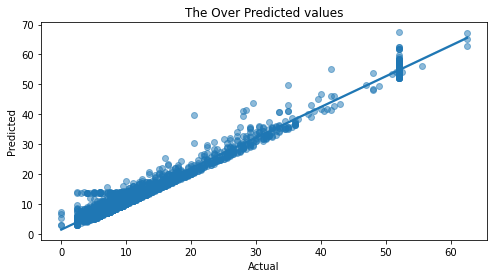

In [169]:
# Create a scatterplot of `residuals` over `predicted`
plt.figure(figsize=(8,4))
sns.regplot(data=results[results['Residual']<0], x='Actual', y='Predicted',scatter_kws={'alpha': 0.5})
plt.title('The Over Predicted values')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [181]:
# Output the model's coefficients

X_train.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
18084,1,1.470833,9.312847,1,0
5236,1,1.090000,9.330702,0,1
17204,1,1.574000,14.895556,1,1
19207,1,1.365000,7.347222,0,1
9527,1,3.278000,15.063333,0,1


In [186]:
coefficients = pd.DataFrame(lm.coef_, columns=X.columns)
coefficients

ValueError: Shape of passed values is (5, 1), indices imply (5, 5)

What do these coefficients mean? How should they be interpreted?

The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \\$7.13. This is incorrect. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$7.13. 

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data). 

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).


2. What results can be presented from this notebook?

*  You can discuss meeting linear regression assumptions, and you can present the MAE and RMSE scores obtained from the model.

==> ENTER YOUR RESPONSE HERE 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 